# Tutorial - Documentation by Example
## In this tutorial, we provide simple examples to demonstrate some of the things one can do with the confidentlearning package. For full package documentation, check out the method docstrings. This tutorial will typically use default parameters, but best results may require hyper-parameter optimization.

In [35]:
# Python 2 and 3 compatibility
from __future__ import print_function, absolute_import, division, unicode_literals, with_statement

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
from models.mnist_pytorch import CNN

In [22]:
from sklearn.datasets import load_digits

In [ ]:
rndperm = np.random.permutation(df.shape[0])


import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
     ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [32]:
data  = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size = 0.2, random_state = 0)

In [33]:
X_train

array([[ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  3., 12., ..., 16.,  2.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [68]:

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_linearly_seperable_dataset(n_classes = 3):
    X, y = make_classification(n_samples = 50 * n_classes, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_classes=n_classes)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    return (X, y)


/home/cgn/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/cgn/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/cgn/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/cgn/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

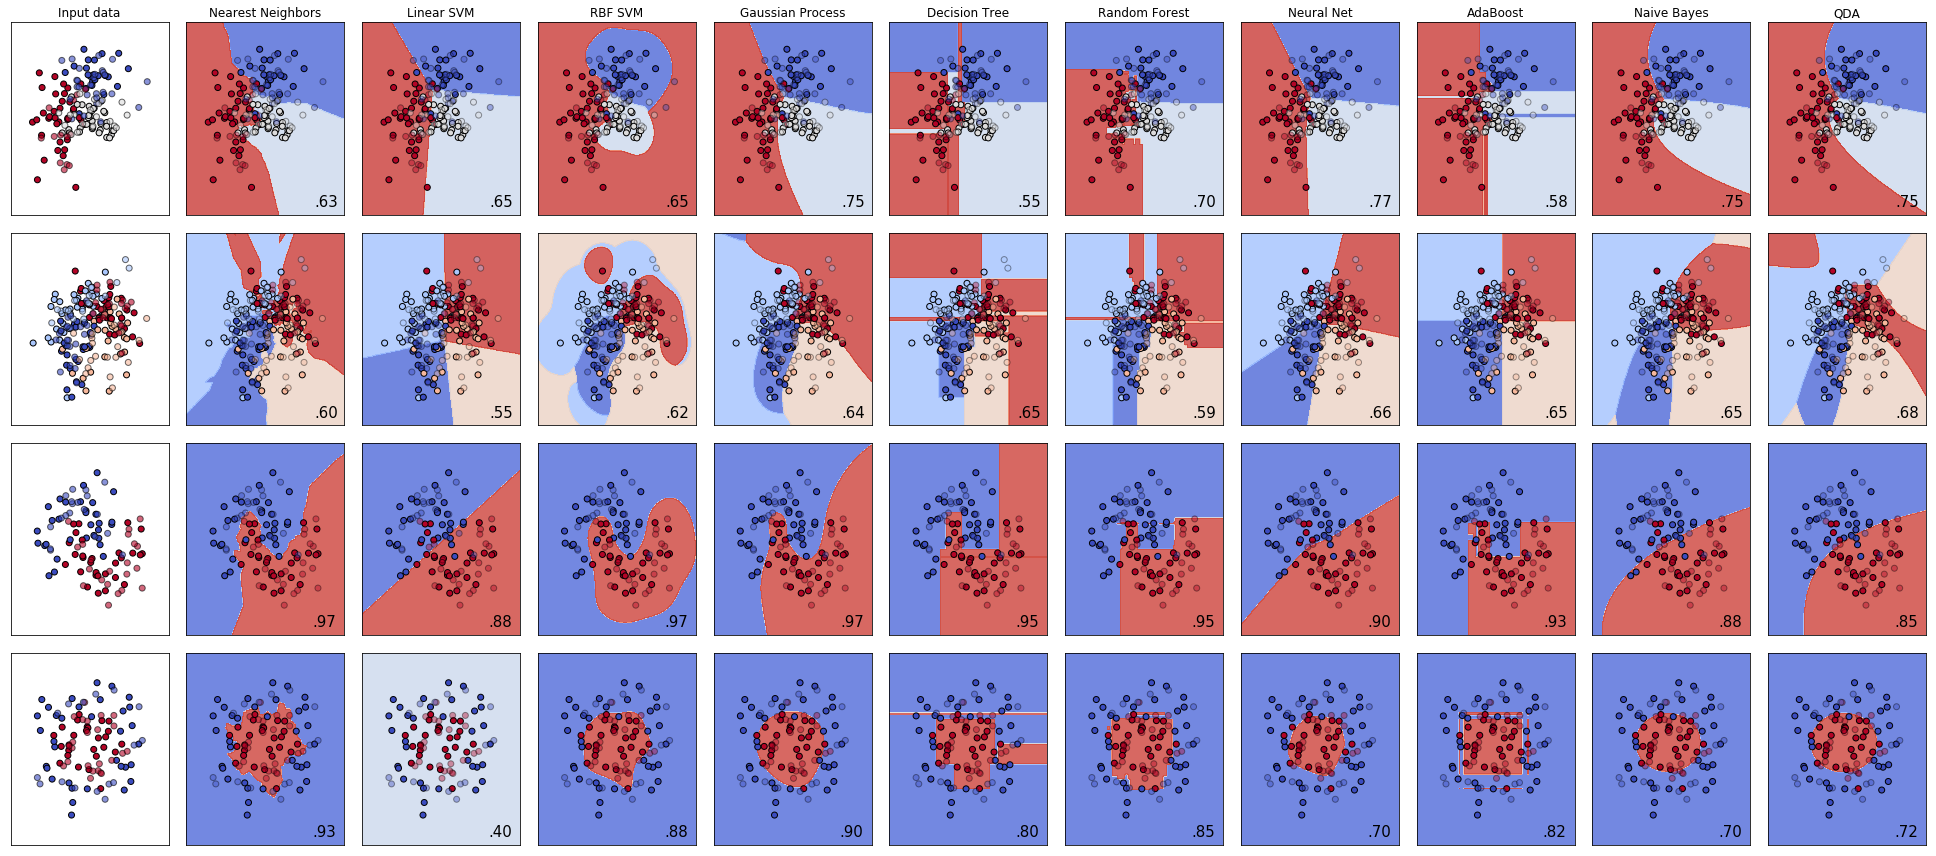

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

datasets = [
    make_linearly_seperable_dataset(n_classes=3),
    make_linearly_seperable_dataset(n_classes=4),
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
]

figure = plt.figure(figsize=(27, 12))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    # just plot the dataset first
    cm = plt.cm.Set1
    cm = plt.cm.coolwarm
#     cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        clf.predict_proba(X_test)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        
        plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm,
                   edgecolors='k', alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Multiclass learning with noisy labels (in **3** lines of code)
**rankpruning** is a fast, general, robust algorithm for multiclass learning with noisy labels. It adds minimal overhead, needing only *O(nm<sup>2</sup>)* time for n training examples and m classes, works with any classifier, and is easy to use.

In [21]:
from confidentlearning.classification import RankPruning
# RankPruning uses logreg by default, so this is unnecessary. 
# We include it here for clarity, but this step is omitted below.
from sklearn.linear_model import LogisticRegression as logreg

# Wrap around any classifier. Yup, neural networks work, too.
rp = RankPruning(clf=logreg()) 
# X_train is numpy matrix of training examples (integers for large data)
# train_labels_with_errors is a numpy array of labels of length n (# of examples), usually denoted 's'.
rp.fit(X_train, train_labels_with_errors) 
# Estimate the predictions you would have gotten by training with *no* label errors.
predicted_test_labels = rp.predict(X_test)

NameError: name 'train_labels_with_errors' is not defined

In [ ]:
\
### Estimate the confident joint, the latent noisy channel matrix, *P<sub>s | y</sub>* and inverse, *P<sub>y | s</sub>*, the latent prior of the unobserved, actual true labels, *p(y)*, and the predicted probabilities.:
where *s* denotes a random variable that represents the observed, noisy label and *y* denotes a random variable representing the hidden, actual labels. Both *s* and *y* take any of the m classes as values. The **confidentlearning** package supports different levels of granularity for computation depending on the needs of the user. Because of this, we support multiple alternatives, all no more than a few lines, to estimate these latent distribution arrays, enabling the user to reduce computation time by only computing what they need to compute, as seen in the examples below.

Throughout these examples, you'll see a variable called *confident_joint*. The confident joint is an m x m matrix (m is the number of classes) that counts, for every observed, noisy class, the number of examples that confidently belong to every latent, hidden class. It counts the number of examples that we are confident are labeled correctly or incorrectly for every pair of obseved and unobserved classes. The confident joint is an unnormalized estimate of the complete-information latent joint distribution, *P<sub>s,y</sub>*. Most of the methods in the **confidentlearing** package start by first estimating the *confident_joint*.

#### Option 1: Compute the confident joint and predicted probs first. Stop if that's all you need.
```python
from confidentlearning.latent_estimation import estimate_latent
from confidentlearning.latent_estimation import estimate_confident_joint_and_cv_pred_proba

# Compute the confident joint and the n x m predicted probabilities matrix (psx),
# for n examples, m classes. Stop here if all you need is the confident joint.
confident_joint, psx = estimate_confident_joint_and_cv_pred_proba(
    X=X_train, 
    s=train_labels_with_errors,
    clf = logreg(), # default, you can use any classifier
)

# Estimate latent distributions: p(y) as est_py, P(s|y) as est_nm, and P(y|s) as est_inv
est_py, est_nm, est_inv = estimate_latent(confident_joint, s=train_labels_with_errors)
```

#### Option 2: Estimate the latent distribution matrices in a single line of code.
```python
from confidentlearning.latent_estimation import estimate_py_noise_matrices_and_cv_pred_proba
est_py, est_nm, est_inv, confident_joint, psx = estimate_py_noise_matrices_and_cv_pred_proba(
    X=X_train,
    s=train_labels_with_errors,
)
```

#### Option 3: Skip computing the predicted probabilities if you already have them
```python
# Already have psx? (n x m matrix of predicted probabilities)
# For example, you might get them from a pre-trained model (like resnet on ImageNet)
# With the confidentlearning package, you estimate directly with psx.
from confidentlearning.latent_estimation import estimate_py_and_noise_matrices_from_probabilities
est_py, est_nm, est_inv, confident_joint = estimate_py_and_noise_matrices_from_probabilities(
    s=train_labels_with_errors, 
    psx=psx,
)

``` 

### Estimate label errors in a dataset:
With the **confidentlearning** package, we can instantly fetch the indices of all estimated label errors, with nothing provided by the user except a classifier, examples, and their noisy labels. Like the previous example, there are various levels of granularity.

```python
from confidentlearning.pruning import get_noise_indices
# We computed psx, est_inv, confident_joint in the previous example.
label_errors = get_noise_indices(
    s=train_labels_with_errors, # required
    psx=psx, # required
    inverse_noise_matrix=est_inv, # not required, include to avoid recomputing
    confident_joint=confident_joint, # not required, include to avoid recomputing
)
``` 


### Estimate the latent joint probability distribution matrix of the noisy and true labels, *P<sub>s,y</sub>*: 
There are two methods to compute *P<sub>s,y</sub>*, the complete-information distribution matrix that captures the number of pairwise label flip errors when multipled by the total number of examples as *n * P<sub>s,y</sub>*.

#### Method 1: Guarantees the rows of *P<sub>s,y</sub>* correctly sum to *p(s)*, by first computing *P<sub>y | s</sub>*. 
This method occurs when hyperparameter prune_count_method = 'inverse_nm_dot_s' in RankPruning.fit() and get_noise_indices(). 

```python
from confidentlearning.util import value_counts
# *p(s)* is the prior of the observed, noisy labels and an array of length m (# of classes)
ps = value_counts(s) / float(len(s))
# We computed est_inv (estimated inverse noise matrix) in the previous example (two above).
psy = np.transpose(est_inv * ps) # Matrix of prob(s=l and y=k)
```


#### Method 2: Simplest. Compute by re-normalizing the confident joint. Rows won't sum to *p(s)*
This method occurs when hyperparameter prune_count_method = 'calibrate_confident_joint' in RankPruning.fit() and get_noise_indices().
```python
from confidentlearning.util import value_counts
# *p(s)* is the prior of the observed, noisy labels and an array of length m (# of classes)
ps = value_counts(s) / float(len(s))
# We computed confident_joint in the previous example (two above).
psy = confident_joint / float(confident_joint.sum()) # calibration, i.e. re-normalization
```

### Generate valid, class-conditional, unformly random noisy channel matrices:

```python
# Generate a valid (necessary conditions for learnability are met) noise matrix for any trace > 1
from confidentlearning.noise_generation import generate_noise_matrix_from_trace
noise_matrix = generate_noise_matrix_from_trace(
    K = number_of_classes, 
    trace = float_value_greater_than_1_and_leq_K,
    py = prior_of_y_actual_labels_which_is_just_an_array_of_length_K,
    frac_zero_noise_rates = float_from_0_to_1_controlling_sparsity,
)

# Check if a noise matrix is valid (necessary conditions for learnability are met)
from confidentlearning.noise_generation import noise_matrix_is_valid
is_valid = noise_matrix_is_valid(noise_matrix, prior_of_y_which_is_just_an_array_of_length_K)

```

### Support for numerous *weak supervision* and *learning with noisy labels* functionalities:

```python
# Generate noisy labels using the noise_marix. Guarantees exact amount of noise in labels.
from confidentlearning.noise_generation import generate_noisy_labels
s_noisy_labels = generate_noisy_labels(y_hidden_actual_labels, noise_matrix)

# This package is a full of other useful methods for learning with noisy labels.
# The tutorial stops here, but you don't have to. Inspect method docstrings for full docs.
```